In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ML Data/sales_data_sample.csv',encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


In [7]:
df.drop(columns=['ORDERDATE','STATUS','MONTH_ID','QTR_ID','YEAR_ID'],inplace=True)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Motorcycles,95,S10_1678,USA,Medium


In [8]:
from sklearn.preprocessing import LabelEncoder
def convert_categories(col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].values)

In [9]:
categories = ['PRODUCTLINE','PRODUCTCODE','COUNTRY','DEALSIZE']
for col in categories:
    convert_categories(col)

In [10]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,95,0,18,2
1,34,81.35,5,2765.90,1,95,0,6,2
2,41,94.74,2,3884.34,1,95,0,6,1
3,45,83.26,6,3746.70,1,95,0,18,1
4,49,100.00,14,5205.27,1,95,0,18,1


In [12]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=15)
    kmeans.fit(df)
    
    wcss.append(kmeans.inertia_)

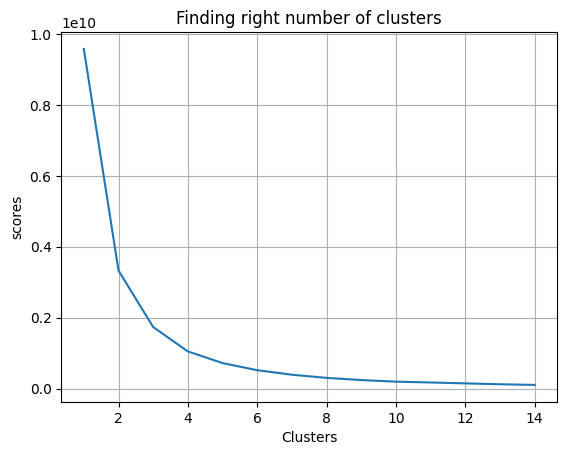

In [13]:
k = list(range(1,15))
plt.plot(k,wcss)
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.title('Finding right number of clusters')
plt.grid()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=15)
kmeans.fit(df)
clusters = kmeans.predict(df)  # Assign cluster labels to each data point
df['Cluster'] = clusters       # Optional: Add cluster labels to the original DataFrame


In [16]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,Cluster
0,30,95.70,2,2871.00,1,95,0,18,2,0
1,34,81.35,5,2765.90,1,95,0,6,2,0
2,41,94.74,2,3884.34,1,95,0,6,1,2
3,45,83.26,6,3746.70,1,95,0,18,1,2
4,49,100.00,14,5205.27,1,95,0,18,1,2
